In [12]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Set path to line catalogue and xml-data
import os
# Uncomment and adjust the following lines
# if ARTS_DATA_PATH is not set as environment variable
# os.environ["ARTS_DATA_PATH"] = "your_path_to/arts-xml-data/:your_path_to/arts-cat-data/:"
os.environ["ARTS_DATA_PATH"] = "../../../arts-xml-data/:../../../arts-cat-data/:"

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import typhon as ty
from pyarts import xml
from olr_module import calc_olr, Change_T_with_RH_const

plt.style.use(ty.plots.styles("typhon"))

In [15]:
# Read input atmosphere
atmfield = xml.load("input/midlatitude-summer.xml")

# Scale the CO2 concentration
atmfield.scale("abs_species-CO2", 1)

# Add a constant value to the temperature
atmfield.set("T", atmfield.get("T") + 0)

# Add a constant value to the temperature but 
# without changing relative humidity 
atmfield = Change_T_with_RH_const(atmfield,DeltaT=0)

# Calculate the outgoing-longwave radiation
f, olr = calc_olr(atmfield, verbosity=0)

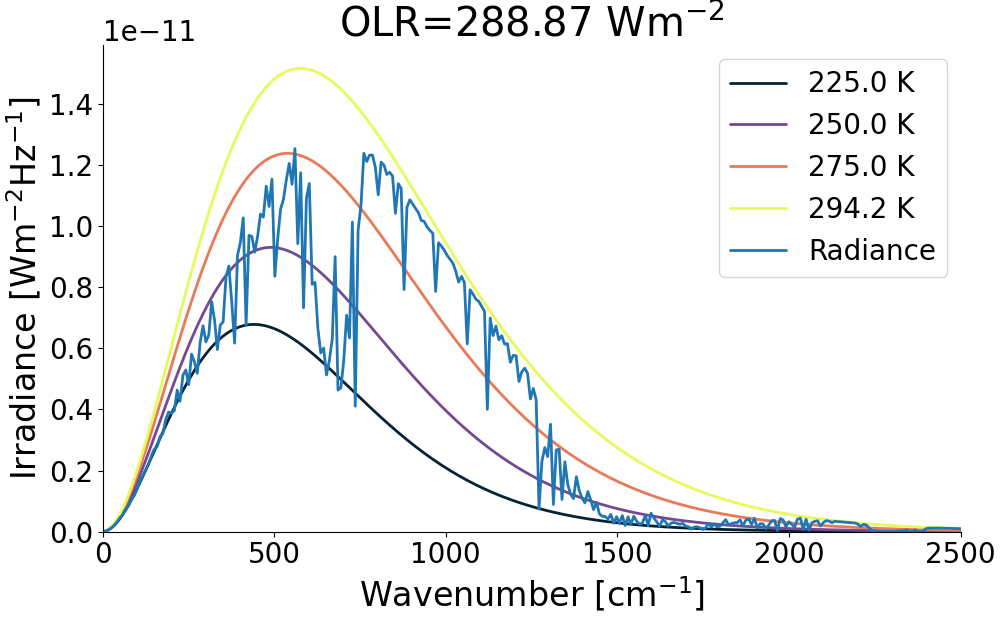

In [16]:
# Plotting.
import matplotlib
font = {'size'   : 24}
matplotlib.rc('font', **font)

wn = ty.physics.frequency2wavenumber(f) / 100  # Hz -> cm^-1

temps = [225, 250, 275, atmfield.get("T", keep_dims=False)[0]]
temp_colors = ty.plots.cmap2rgba("temperature", len(temps))

fig, ax = plt.subplots()
for t, color in sorted(zip(temps, temp_colors)):
    ax.plot(
        wn, np.pi * ty.physics.planck(f, t), label=f"{t:3.1f} K", color=color
    )
ax.plot(wn, olr, color="C0", label="Irradiance")
ax.legend()
ax.set_title(rf"OLR={np.trapz(olr, f):3.2f} $\sf Wm^{{-2}}$")
ax.set_xlim(wn.min(), wn.max())
ax.set_xlabel(r"Wavenumber [$\sf cm^{-1}$]")
ax.set_ylabel(r"Irradiance [$\sf Wm^{-2}Hz^{-1}$]")
ax.set_ylim(bottom=0)
fig.savefig("plots/olr.pdf")